In [1]:
import os
import pathlib as p

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
HOME_PATH = p.Path(os.getcwd())
DATA_PATH = HOME_PATH.joinpath('data')

## _Dataset_

O _Dataset_ utilizado é o ___Breast Cancer Wisconsin (Diagnostic) Data Set___, com informações de imagens digitalizadas de tumores em seios.

As _features_ presentes no conjunto de dados são as medidas e descrições dessas massas, levando a identificação sobre o tumor ser benigno ou maligno.

O _dataset_ pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

In [3]:
data_file_path = DATA_PATH.joinpath('data.csv')

data = pd.read_csv(data_file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Remapeia os labels de classificação
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separa os casos negativos e positivos
negative = data[data['diagnosis'] == 0]
positive = data[data['diagnosis'] == 1]

## Análise de Frequência sobre _Features_

Nesta seção, será realizada a etapa __A__ do trabalho. Serão realizadas comparações entre _features_ para casos positivos e negativos, buscando identificar fatores comuns nas classificações possíveis.

Serão gerados histogramas com 15 e 30 _bins_ para análise.

In [7]:
# Função que gera o histograma comparando as features nas duas classes possíveis
def plot_feature_histogram_between_two_classes(data_class_1, data_class_2, feature_name, feature_label, label_class_1, label_class_2, bins, alpha: float = 0.6, color_class_1: str = 'red', color_class_2: str = 'blue', kde: bool = True):
    sns.histplot(data_class_1[feature_name], bins=bins, color=color_class_1, alpha=alpha, label=label_class_1, kde=True)
    sns.histplot(data_class_2[feature_name], bins=bins, color=color_class_2, alpha=alpha, label=label_class_2, kde=True)
    plt.title(f'Histograma de {feature_label}')
    plt.xlabel(feature_label)
    plt.ylabel('Frequência')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Primeira _Feature_

A primeira análise é sobre a _feature_ ___radius_mean___, a qual representa a média das distâncias do centro do tumor até suas extremidades.

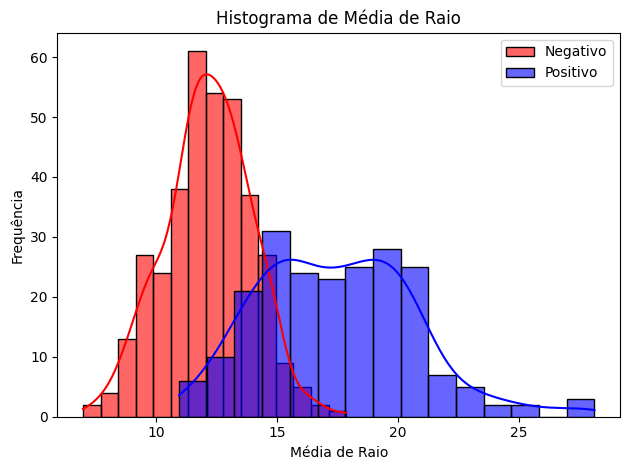

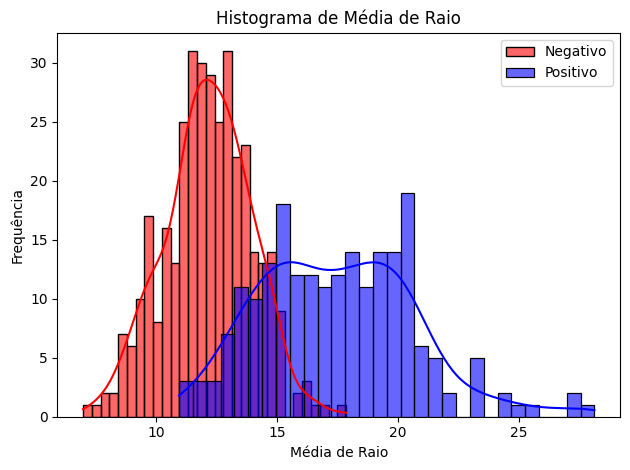

In [8]:
feature_name = 'radius_mean'
feature_label = 'Média de Raio'
label_class_1 = 'Negativo'
label_class_2 = 'Positivo'

bins = 15
plot_feature_histogram_between_two_classes(negative, positive, feature_name, feature_label, label_class_1, label_class_2, bins)

bins = 30
plot_feature_histogram_between_two_classes(negative, positive, feature_name, feature_label, label_class_1, label_class_2, bins)

É possível ver que, apesar de ocorrer alguma sobreposição nos histogramas, há uma grande quantidade de casos positivos que estão em valores bem acima do valor máximo de um caso negativo.

Assim, pode-se afirmar que há importância na análise deste _feature_ em um projeto de aprendizado de máquina pois há boa distinção entre as classificações realizadas sobre os valores dispostos no gráfico.

Além disso, a análise com diferentes quantidade de _bins_ mostra as nuâncias e detalhes de cada distribuição, apesar de a curva continuar a mesma. Assim, o primeiro gráfico é válido para uma análise inicial, enquanto o segundo é muito importante para confirmar a tendência descrita nos parágrafos anteriores.

### Segunda _Feature_

A segunda análise é sobre a _feature_ ___smoothness mean___, a qual representa a média da suavidade dos raios do contorno das células tumorais.

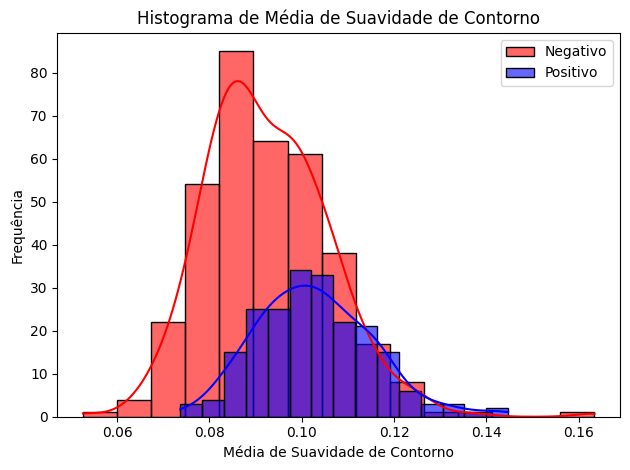

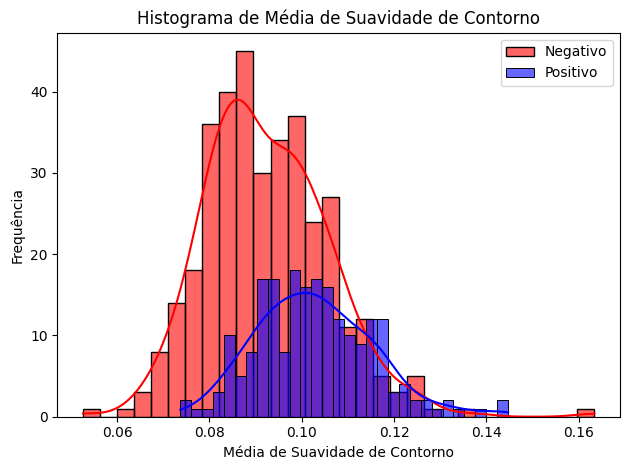

In [9]:
feature_name = 'smoothness_mean'
feature_label = 'Média de Suavidade de Contorno'
label_class_1 = 'Negativo'
label_class_2 = 'Positivo'

bins = 15
plot_feature_histogram_between_two_classes(negative, positive, feature_name, feature_label, label_class_1, label_class_2, bins)

bins = 30
plot_feature_histogram_between_two_classes(negative, positive, feature_name, feature_label, label_class_1, label_class_2, bins)

Na segunda _feature_, percebe-se que a sobreposição dos gráficos é bem maior, dificultando a precisão em afirmar que um determinado valor nessa _feature_ pode levar a uma classificação positiva ou negativa - comportamento diferente da primeira _feature_ analisada.

No mais, a análise sobre duas diferentes quantidades de _bins_ segue a mesma, replicando a explicação feita anteriormente.

## Produção de Dados Artificiais

Nesta seção, será realizada a etapa __B__ do trabalho com a _feature_ ___radius_mean___.

In [10]:
feature = 'radius_mean'

# Coletânea de média e desvio padrão de casos negativos e positivos, respectivamente
negative_mean = negative[feature].mean()
negative_std = negative[feature].std()
positive_mean = positive[feature].mean()
positive_std = positive[feature].std()

In [15]:
np.random.seed(42)

samples = 100

# Gera dados artificiais de acordo com as estatísticas
negative_artificial = np.random.normal(negative_mean, negative_std, samples)
positive_artificial = np.random.normal(positive_mean, positive_std, samples)

In [19]:
# Une dados artificiais
artificial_data = np.concatenate([positive_artificial, negative_artificial])
# Gera classificações artificiais
artificial_labels = np.concatenate([np.zeros(samples), np.ones(samples)])

# Cria DataFrame com os dados artificiais
artificial_df = pd.DataFrame({'radius_mean': artificial_data, 'diagnosis': artificial_labels})

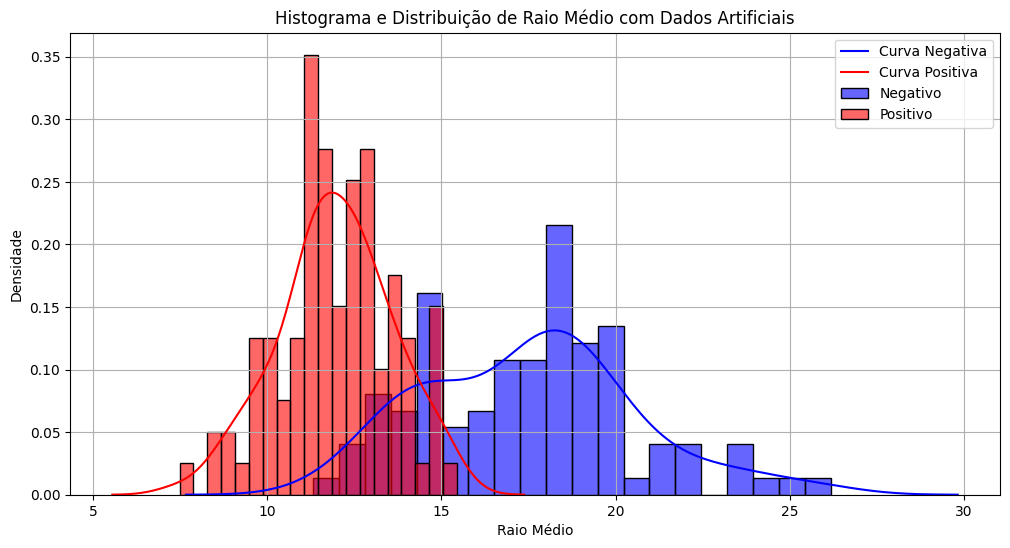

In [23]:
plt.figure(figsize=(12, 6))

sns.histplot(artificial_df[artificial_df['diagnosis'] == 0]['radius_mean'], bins=20, color='blue', alpha=0.6, label='Negativo', kde=False, stat='density')
sns.kdeplot(artificial_df[artificial_df['diagnosis'] == 0]['radius_mean'], color='blue', label='Curva Negativa')

sns.histplot(artificial_df[artificial_df['diagnosis'] == 1]['radius_mean'], bins=20, color='red', alpha=0.6, label='Positivo', kde=False, stat='density')
sns.kdeplot(artificial_df[artificial_df['diagnosis'] == 1]['radius_mean'], color='red', label='Curva Positiva')

plt.title('Histograma e Distribuição de Raio Médio com Dados Artificiais')
plt.xlabel('Raio Médio')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()